### Preprocessing and Exploration of the Data Set

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Train-Val-Test-Split = 0.9000093536619587: 0.049995323169020674 : 0.049995323169020674:


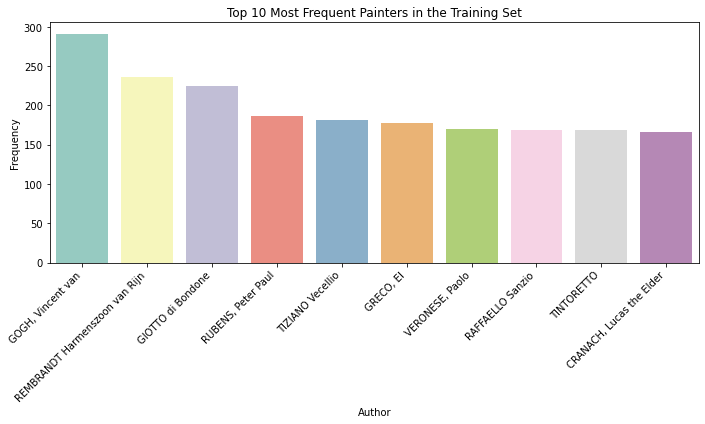

False
['GOGH, Vincent van', 'REMBRANDT Harmenszoon van Rijn', 'GIOTTO di Bondone', 'RUBENS, Peter Paul', 'TIZIANO Vecellio', 'GRECO, El', 'VERONESE, Paolo', 'RAFFAELLO Sanzio', 'TINTORETTO', 'CRANACH, Lucas the Elder']
['GOGH, Vincent van', 'UNKNOWN MASTER, Italian', 'GIOTTO di Bondone', 'RUBENS, Peter Paul', 'VERONESE, Paolo', 'TIZIANO Vecellio', 'VELÁZQUEZ, Diego Rodriguez de Silva y', 'REMBRANDT Harmenszoon van Rijn', 'CRANACH, Lucas the Elder', 'GRECO, El']
['REMBRANDT Harmenszoon van Rijn', 'GOGH, Vincent van', 'CRANACH, Lucas the Elder', 'RUBENS, Peter Paul', 'UNKNOWN MASTER, Italian', 'ANGELICO, Fra', 'TIZIANO Vecellio', 'GIOTTO di Bondone', 'MANTEGNA, Andrea', 'DEGAS, Edgar']


,IMAGE_FILE,DESCRIPTION,AUTHOR
0,19873-1darmst.jpg,"The Meyer or Darmstadt Madonna is the last, mo...","HOLBEIN, Hans the Younger"
1,18759-guard301.jpg,Whereas Canaletto incorporates classically ins...,"GUARDI, Francesco"
2,04589-temptati.jpg,In this painting the refinement of the colouri...,"BILIVERT, Giovanni"
3,15104-magi.jpg,"The left side of the painting was cut, origina...",GEERTGEN tot Sint Jans
4,36582-paolo_f1.jpg,The painting illustrates a famous episode from...,"SCHEFFER, Ary"


In [2]:
# load data

# directory where semArt data is stored
BASE_DIR = "/Users/rea/Library/Mobile Documents/com~apple~CloudDocs/MSc_IT_and_Cognition/springsemester2024/ComputationalCognitiveScienceII/Exam/Project/MM_Painting_Classification"

train_df = pd.read_csv(os.path.join(BASE_DIR, "SemArt/semart_train.csv"), encoding='iso-8859-1', sep='\t')
val_df = pd.read_csv(os.path.join(BASE_DIR, "SemArt/semart_val.csv"), encoding='iso-8859-1', sep='\t')
test_df = pd.read_csv(os.path.join(BASE_DIR, "SemArt/semart_test.csv"), encoding='iso-8859-1', sep='\t')

train_df = train_df.iloc[:, :3] # keep only image file, description, and author
val_df = val_df.iloc[:, :3]
test_df = test_df.iloc[:, :3]

total_data = len(train_df) + len(val_df) + len(test_df)
print(f"Train-Val-Test-Split = {len(train_df)/total_data}: {len(val_df)/total_data} : {len(test_df)/total_data}:")

# keep split from original data set and change it later if needed

# plot the 10 most frequent painters
#### COPIED
# Count occurrences of each author
author_counts = train_df['AUTHOR'].value_counts()

# select top 10 authors
top_10_authors = author_counts.head(10)

#sns.set_palette("pastel")
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_authors.index, y=top_10_authors.values, palette='Set3')
plt.title('Top 10 Most Frequent Painters in the Training Set')
plt.xlabel('Author')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ensure that the 10 most frequent painters are the same in all three data sets
print(sorted(train_df['AUTHOR'].value_counts().head(10).index.tolist()) == sorted(val_df['AUTHOR'].value_counts().head(10).index.tolist()) == sorted(test_df['AUTHOR'].value_counts().head(10).index.tolist()))
print(train_df['AUTHOR'].value_counts().head(10).index.tolist())
print(val_df['AUTHOR'].value_counts().head(10).index.tolist())
print(test_df['AUTHOR'].value_counts().head(10).index.tolist())
train_df.head() # show data frame

### Undersampling regarding the 10th most frequent painter in all data sets (Balancing classes)

Because the most frequent painters are not the same, we concatenate the data sets, sample for the 10 most frequent painters in total, undersample for the least frequent painter of these 10, and then split the data into training, validation, and test set. Undersampling rather than oversampling by data augmentation was chosen due to computational complexity and limited computing ressources.

In [3]:
combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True) # combine data frames

combined_df.dropna(inplace=True) # drop nan

author_counts = train_df['AUTHOR'].value_counts()
top_10_painters = author_counts.head(10).index.tolist() # get ten most frequent painters
print(top_10_painters)

least_frequent_10 = top_10_painters[-1] # get least frequent painter of these 10
print(least_frequent_10)
combined_df = combined_df[combined_df['AUTHOR'].isin(top_10_painters)] # drop all other painters

undersampled_df = combined_df[combined_df['AUTHOR'] != least_frequent_10].sample(frac=1, random_state=42) # undersample randomly regarding the least frequent painters of the 10 most frequent painters
undersampled_df.reset_index(drop=True, inplace=True)

print(len(undersampled_df)) # only 1990 data points in total. Optional: increase number of painters and use f1 as a metric.
undersampled_df.head()

['GOGH, Vincent van', 'REMBRANDT Harmenszoon van Rijn', 'GIOTTO di Bondone', 'RUBENS, Peter Paul', 'TIZIANO Vecellio', 'GRECO, El', 'VERONESE, Paolo', 'RAFFAELLO Sanzio', 'TINTORETTO', 'CRANACH, Lucas the Elder']
CRANACH, Lucas the Elder
1990


,IMAGE_FILE,DESCRIPTION,AUTHOR
0,16977-1etten1.jpg,"Catalogue numbers: F 62, JH 922.The painter An...","GOGH, Vincent van"
1,32944-051portr.jpg,Circa 1800 it was believed that the painting i...,RAFFAELLO Sanzio
2,39828-5allegor.jpg,Connected to Titian's late portraits is the Al...,TIZIANO Vecellio
3,17214-copies06.jpg,"Catalogue numbers: F 692, JH 1784","GOGH, Vincent van"
4,39268-5moses.jpg,"While Moses, transfigured by divine light, rec...",TINTORETTO


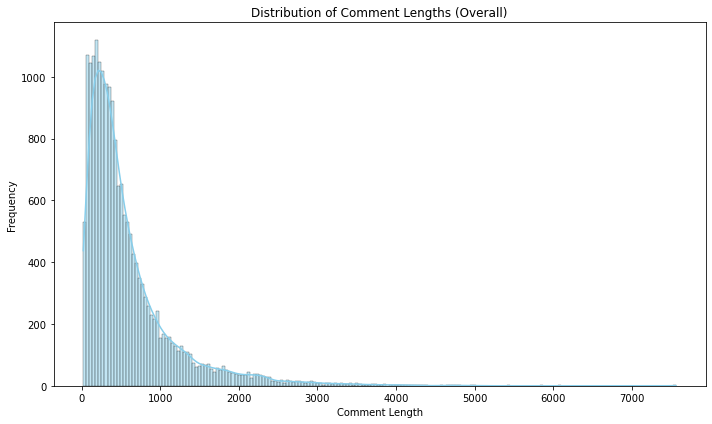

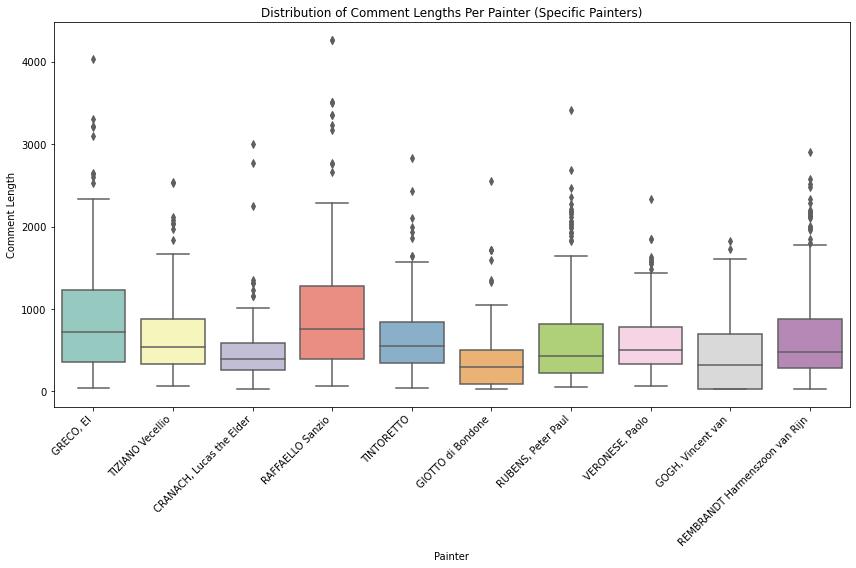

In [7]:
# show comment length distribution

# COPIED: CHANGE HERE
# Step 1: Calculate Comment Lengths
train_df['comment_length'] = train_df['DESCRIPTION'].apply(lambda x: len(str(x)))

# Step 2: Plot Overall Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['comment_length'], kde=True, color='skyblue')
plt.title('Distribution of Comment Lengths (Overall)')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 3: Plot Distribution Per Painter

# List of specific painters
specific_painters = top_10_painters # Replace with your list

# Filter train_df to include only data for specific painters
specific_painters_df = train_df[train_df['AUTHOR'].isin(specific_painters)]

# Plot Distribution Per Painter for specific painters
plt.figure(figsize=(12, 8))
sns.boxplot(x='AUTHOR', y='comment_length', data=specific_painters_df, palette='Set3')
plt.title('Distribution of Comment Lengths Per Painter (Specific Painters)')
plt.xlabel('Painter')
plt.ylabel('Comment Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Some comments are very long but generally for the ten painters chosen the distribution does not differ too much if we truncate the comments to the maximal number of tokens allowed by BERT (512).

### Train-Val-Test split

In [9]:
# change this! COPIED

from sklearn.model_selection import train_test_split

# First, split the data into training and remaining data
train_data, remaining_data = train_test_split(combined_df, test_size=0.1, random_state=42)

# Then, split the remaining data into validation and test sets
val_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42)

# check split ratio
total_data = len(train_data) + len(val_data) + len(test_data)
print(f"Train-Val-Test-Split = {len(train_data)/total_data}: {len(val_data)/total_data} : {len(test_data)/total_data}")

# reset indexes
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

Train-Val-Test-Split = 0.9: 0.05 : 0.05


### Truncate comment descriptions to 512 characters (BERT has limit of 512 token)

In [10]:
max_length = 512 # DO THAT LATER

datasets = [train_data, val_data, test_data]
for df in datasets:
    df.loc[:,'DESCRIPTION'] = df.loc[:,'DESCRIPTION'].apply(lambda x: x[:max_length])

# CHANGE, copied!!
max_length = train_data['DESCRIPTION'].str.len().max()
min_length = train_data['DESCRIPTION'].str.len().min()

print("Maximum length of description column:", max_length)
print("Minimum length of description column:", min_length) 

Maximum length of description column: 512
Minimum length of description column: 28


/Users/rea/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


### NER to mask painters's names

In [11]:
#!pip install spacy
#!python -m spacy download en_core_web_sm
import spacy
from spacy import displacy

# some preliminary tests
text = "Morazzone's characteristic style is fully developed in his frescoes in the chapels of Sacro Monte of Varese and Sacro Monte of Varallo."
# Load English tokenizer, tagger, parser, and NER
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

displacy.render(doc, style="ent", jupyter=True)

This is not working well... We have a lot of painters with a not English sounding surname, so the NER does not perform well. Here, Morazzone is labeled as an ORG, even though it is the painters name.

In [22]:
# some random tests for other comments:
sample_NER = df.sample(n=10)
counter = 1
for index,row in sample_NER.iterrows():
    text = row["DESCRIPTION"]
    painter = row["AUTHOR"]
    doc = nlp(text)
    print(f"{counter}. {painter}: ")
    counter += 1
    displacy.render(doc, style="ent", jupyter=True)
    

1. TINTORETTO: 


2. TIZIANO Vecellio: 


3. GRECO, El: 


4. TINTORETTO: 


5. TIZIANO Vecellio: 


6. RUBENS, Peter Paul: 


7. GRECO, El: 


8. VERONESE, Paolo: 


9. TIZIANO Vecellio: 


10. TIZIANO Vecellio: 


Conclusion: If the label is "GRECO,El", usually in the comment the name is mentioned as "El Greco" (similarly "CRANACH, Lucas the Elder" as "Cranach" but also "TIZIANO" as "Titian"). For 10-20 Painters a manual dictionary with possible names is possible. Additionally, NER recognized the painters' names but sometimes they are tagged as "ORG". Thus, all NEs are considered and checked whether they can be mapped to the painter's name (label in dictionary). ALSO, WE MIGHT WANT TO OVERSAMPLE SOMEHOW (IMAGE AUGMENTATION IS NO PROBLEM VIA FLIPPING, ROTATION ETC. BUT TEXT AUGMENTATION? THROUGH NLPAUG MAYBE?)

In [33]:
# manually create painters' names dictionary
painter_dict = dict.fromkeys(df['AUTHOR'].unique())

# NER sometimes does not recognize possessive markers, sometimes it does 
painter_dict["GOGH, Vincent van"] = ["van Gogh", "Van Gogh", "van Gogh's", "Vincent van Gogh", "Vincent van Gogh's" ]
painter_dict["VERONESE, Paolo"] = ["Verones", "Veronese's", "Paolo Veronese"]
painter_dict['TINTORETTO'] = ["Tintoretto", "Tintoretto's"]
painter_dict['GRECO, El'] = ["El Greco", "Greco", "El Greco's", "Greco's"]
painter_dict['TIZIANO Vecellio'] = ["Titian", "Titian's", "Tiziano Vecellio", "Tiziano Vecellio's"]
painter_dict['GIOTTO di Bondone'] = ["Giotto", "Giotto's"]
painter_dict['RUBENS, Peter Paul'] = ["Rubens", "Rubens'", "Peter Paul Rubens", "Peter Paul Rubens'"]
painter_dict['RAFFAELLO Sanzio'] = ["Raphael", "Raphaels'"]
painter_dict['REMBRANDT Harmenszoon van Rijn'] = ["Rembrandt", "Rembrandt's"]
painter_dict['CRANACH, Lucas the Elder'] = ["Cranach", "Cranach's", "Lucas Cranach", "Lucas Cranach's"]

# replace NERs with [PAINTER] mask if NE is stored in painter_dict

def replace_painter_name(df, painter_dict):
    for index,row in df.iterrows():
        text = row["DESCRIPTION"]
        painter = row["AUTHOR"]
        doc = nlp(text)
        for ent in doc.ents:
            if ent.text in painter_dict[painter]:
                # Replace painter's name with "[PAINTER]"
                text = text.replace(ent.text, "[PAINTER]")
                row["DESCRIPTION"] = text # update dataframe
    return df
                
replace_painter_name(sample_NER, painter_dict)
print(f"Test for Tintoretto: {sample_NER.iloc[0]['DESCRIPTION']}")

datasets = [train_data, val_data, test_data]
for df in datasets:
    df = replace_painter_name(df, painter_dict)

Test for Tintoretto: This painting was described by Ridolfi in 1642 in his biography of [PAINTER]. Ridolfi writes that the picture "is painted of the adulteress at the moment when Our Lord writes the letters in the dirt with his hand, and the Scribes and Pharisees depart, one after the other, concealing themselves among the columns of a portico that is represented with the most rare perspectival skill; and it is a picture filled with much erudition". The pictorial erudition that so struck Ridolfi is demonstrated in the perspec
           IMAGE_FILE                                        DESCRIPTION  \
0  39821-17strada.jpg  In the final period, which saw [PAINTER] focus...   
1   39706-08urbin.jpg  The Venus of Urbino was painted for Guidobaldo...   
2  18275-0814grec.jpg  The painting represents the thirteenth-century...   
3   10341-2bocca1.jpg  La Bocca della Verit&#224; (in English, "the M...   
4  39730-6perseus.jpg  This painting is one of the six 'poesie' paint...   

          

### Save data locally 

In [34]:
import shutil
DIR = "/Users/rea/Documents/Multimodal_Painter_Attribution/data"

if not os.path.exists(DIR):
    os.makedirs(DIR)
    
train_data.to_csv(os.path.join(DIR, "train.csv"), index=False)
val_data.to_csv(os.path.join(DIR, "val.csv"), index=False)
test_data.to_csv(os.path.join(DIR, "test.csv"), index=False)

# get images for fileids and save them into a new folder

DIR_IMG = "/Users/rea/Documents/Multimodal_Painter_Attribution/data/images"

if not os.path.exists(DIR_IMG):
    os.makedirs(DIR_IMG)

painters = list()
for index,row in combined_df.iterrows(): # check whether it is really combined_df we want to use for this
    file_name = row["IMAGE_FILE"]
    # from here copied
    src_path = os.path.join(BASE_DIR, "SemArt/Images", file_name)
    dest_path = os.path.join(DIR_IMG, file_name)
    if os.path.exists(src_path):
        shutil.copyfile(src_path, dest_path)
        painters.append(row["AUTHOR"])

print(sorted(set(painters))) # little check whether only painters are included that are belong top 10
print(sorted(top_10_painters))
print()


['CRANACH, Lucas the Elder', 'GIOTTO di Bondone', 'GOGH, Vincent van', 'GRECO, El', 'RAFFAELLO Sanzio', 'REMBRANDT Harmenszoon van Rijn', 'RUBENS, Peter Paul', 'TINTORETTO', 'TIZIANO Vecellio', 'VERONESE, Paolo']
['CRANACH, Lucas the Elder', 'GIOTTO di Bondone', 'GOGH, Vincent van', 'GRECO, El', 'RAFFAELLO Sanzio', 'REMBRANDT Harmenszoon van Rijn', 'RUBENS, Peter Paul', 'TINTORETTO', 'TIZIANO Vecellio', 'VERONESE, Paolo']



In [37]:
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(combined_df))

1962
109
109
2180


In [39]:
# check how images are stored! 
train_data.head()

# add image id how they are stored in folder...



,IMAGE_FILE,DESCRIPTION,AUTHOR
0,39821-17strada.jpg,"In the final period, which saw [PAINTER] focus...",TIZIANO Vecellio
1,39706-08urbin.jpg,The Venus of Urbino was painted for Guidobaldo...,TIZIANO Vecellio
2,18275-0814grec.jpg,The painting represents the thirteenth-century...,"GRECO, El"
3,10341-2bocca1.jpg,"La Bocca della Verit&#224; (in English, ""the M...","CRANACH, Lucas the Elder"
4,39730-6perseus.jpg,This painting is one of the six 'poesie' paint...,TIZIANO Vecellio
